<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai5(Trang26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. (Lập trình) Dựa trên dữ liệu MNIST5 đã được làm quen ở bài thực hành trước. Sinh
viên hãy thực hiện thao tác gom cụm bằng thuật toán k-Means. Sau đó so sánh kết
quả gom cụm và nhãn lớp có sẵn của dữ liệu này.

1. Tải dữ liệu và Tiền xử lý

Vì k-Means hoạt động trên các vector 1 chiều, chúng ta cần làm phẳng (flatten) ảnh từ kích thước 28x28 thành vector 784 chiều.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
Y = y_train

X_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0
Y_test = y_test

print(f"Kích thước dữ liệu đầu vào cho k-Means: {X.shape}")
print("Nguyễn Thành Luân - 6351071043")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kích thước dữ liệu đầu vào cho k-Means: (60000, 784)
Nguyễn Thành Luân - 6351071043


2. Huấn luyện k-Means

Chúng ta sẽ gom thành 10 cụm (tương ứng với các chữ số từ 0 đến 9). Lưu ý: Quá trình này có thể mất khoảng 1-2 phút do dữ liệu khá lớn

In [2]:

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)

print("Đang huấn luyện k-Means (có thể mất vài phút)...")
kmeans.fit(X)
print("Hoàn thành gom cụm!")
print("\nNguyễn Thành Luân - 6351071043")
clusters = kmeans.labels_

Đang huấn luyện k-Means (có thể mất vài phút)...
Hoàn thành gom cụm!

Nguyễn Thành Luân - 6351071043


3. Gán nhãn thực tế cho các cụm (Label Matching)

Vì k-Means là học không giám sát, nó chỉ biết chia dữ liệu thành các nhóm 0, 1, 2... chứ không biết nhóm đó là số mấy. Ví dụ: k-Means có thể gom tất cả số "7" vào cụm số "0".

Để so sánh được với nhãn thực tế (như đề bài yêu cầu), ta cần bước "Gán nhãn": Với mỗi cụm, ta xem nhãn thực tế nào xuất hiện nhiều nhất trong cụm đó và gán nhãn đó cho cả cụm.

In [3]:

def get_reference_labels(clusters, actual_labels):
    reference_labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        if np.sum(mask) > 0:
            most_common = mode(actual_labels[mask], keepdims=True)[0][0]
            reference_labels[mask] = most_common
    return reference_labels

y_pred = get_reference_labels(clusters, Y)

print("\nNguyễn Thành Luân - 6351071043")
print("Đã gán nhãn thực tế tương ứng cho các cụm.")
print(f"Ví dụ: 20 nhãn thực:     {Y[:20]}")
print(f"Ví dụ: 20 nhãn dự đoán: {y_pred[:20]}")


Nguyễn Thành Luân - 6351071043
Đã gán nhãn thực tế tương ứng cho các cụm.
Ví dụ: 20 nhãn thực:     [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Ví dụ: 20 nhãn dự đoán: [8 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 8 6 7]


Cell 4: So sánh và Đánh giá (Accuracy & Confusion Matrix)

So sánh kết quả gom cụm với nhãn phân lớp có sẵn.


Nguyễn Thành Luân - 6351071043
Độ chính xác của k-Means trên MNIST: 59.10%


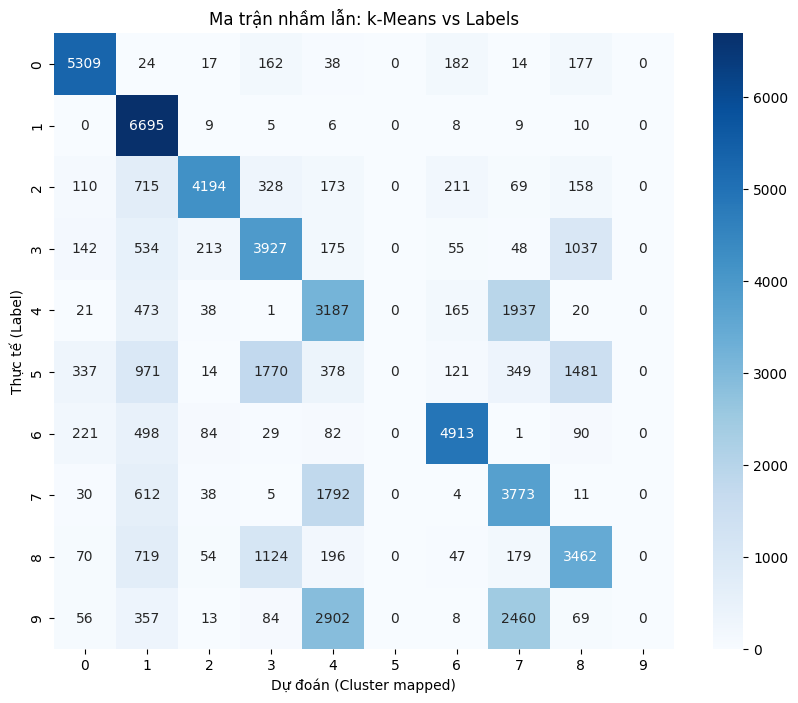

In [4]:
print("\nNguyễn Thành Luân - 6351071043")
acc = accuracy_score(Y, y_pred)
print(f"Độ chính xác của k-Means trên MNIST: {acc*100:.2f}%")

cm = confusion_matrix(Y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán (Cluster mapped)')
plt.ylabel('Thực tế (Label)')
plt.title('Ma trận nhầm lẫn: k-Means vs Labels')
plt.show()

Cell 5: Trực quan hóa Tâm cụm (Centroids)
Đây là phần thú vị nhất. Vì tâm cụm là trung bình cộng của tất cả các ảnh trong cụm đó, nên khi vẽ tâm cụm ra, ta sẽ thấy hình dáng đại diện của các con số mà k-Means đã học được.

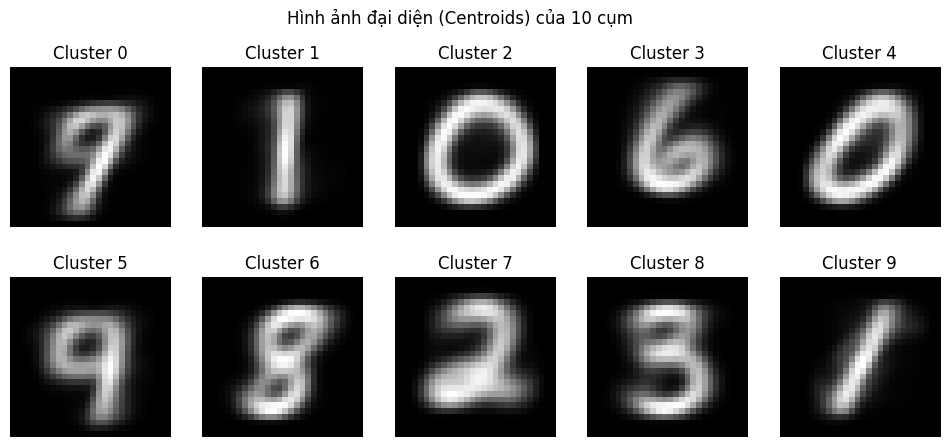


Nguyễn Thành Luân - 6351071043


In [5]:

centers = kmeans.cluster_centers_.reshape(10, 28, 28)

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')
plt.suptitle("Hình ảnh đại diện (Centroids) của 10 cụm")
plt.show()
print("\nNguyễn Thành Luân - 6351071043")